In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate


# 1. Loading the Dataset from CSV

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("heart_2022_cleaned.csv")
# Display sample data
df

,Sex,Age,Race,BMI,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,SleepHours,...,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
0,0,12,0,26.57,4,0.0,0.0,0,0,6.0,...,0,0,0,0,0,0,0,0,0,0
1,0,7,0,25.61,3,2.0,3.0,1,0,5.0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,0,21.77,1,2.0,0.0,1,1,9.0,...,0,1,0,0,0,0,1,0,0,0
3,1,12,0,26.08,0,1.0,0.0,0,0,7.0,...,0,0,1,0,1,0,1,0,0,1
4,0,12,1,22.96,3,0.0,0.0,1,0,7.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318929,1,9,3,29.86,2,0.0,15.0,1,0,7.0,...,0,1,0,0,1,0,1,0,0,1
318930,1,2,0,31.19,2,0.0,0.0,1,0,8.0,...,0,1,0,0,0,0,1,0,0,0
318931,0,6,1,28.66,4,2.0,2.0,1,0,7.0,...,0,0,0,0,0,0,1,0,0,0
318932,1,10,1,32.55,3,0.0,0.0,0,1,5.0,...,0,0,1,0,0,1,1,0,0,0


# 5. Machine Learning

### 5.1. Linear Regression Model (Removed)


### 5.2. Supervised Learning - Random Forests

#### 5.2.1. Loading and Processing Data

In [ ]:
# # Load the data into a Pandas DataFrame
# df = pd.read_csv("heart_2022_cleaned.csv")

# # Copy dataset for Random Forests - Supervised Learning
# df5 = df.copy()

# # Define features set X
# X = df5.drop("HeartAttack", axis=1)
# # Define target vector y
# y = df5["HeartAttack"].values

# # Dealing with Imbalanced Data
# # Scale features to [0, 1] range
# X_scaled = MinMaxScaler().fit_transform(X)

# # SMOTE for Resampling (OVERSAMPLING) to balance the dataset
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# # Split the data into training, validation, and test using train_test_split with stratification
# X_train, X_temp, y_train, y_temp = train_test_split(
#     X_resampled, 
#     y_resampled, 
#     stratify=y_resampled,  # to maintain the same proportion of classes in both train and test sets
#     test_size=0.3,
#     random_state=78
# )

# X_val, X_test, y_val, y_test = train_test_split(
#     X_temp,
#     y_temp,
#     stratify=y_temp,
#     test_size=0.5,
#     random_state=78
# )

# # Create a StandardScaler instance
# scaler = StandardScaler()

# # Fit the StandardScaler and Scale the data
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# # Create a Random Forest classifier
# rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# # Define a grid of hyperparameters for GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# # Implement GridSearchCV with cross-validation and early stopping
# grid_search = GridSearchCV(
#     estimator=rf_model,
#     param_grid=param_grid,
#     cv=3,  # 3-fold cross-validation
#     n_jobs=-1,
#     scoring='accuracy',
#     verbose=2
# )

# # Fitting the model
# grid_search.fit(X_train_scaled, y_train)

# # Print the best parameters and best cross-validation score
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# # Evaluate the best model on the validation set
# best_rf_model = grid_search.best_estimator_
# val_predictions = best_rf_model.predict(X_val_scaled)
# val_acc_score = accuracy_score(y_val, val_predictions)
# print(f"Validation Accuracy Score: {val_acc_score}")

# # Making predictions using the testing data
# test_predictions = best_rf_model.predict(X_test_scaled)

# from sklearn.metrics import log_loss

# # Predictions
# y_train_pred = best_rf_model.predict(X_train_scaled)
# y_val_pred = best_rf_model.predict(X_val_scaled)
# y_test_pred = best_rf_model.predict(X_test_scaled)

# # and Predict Probabilities
# y_train_prob = best_rf_model.predict_proba(X_train_scaled)[:, 1]
# y_val_prob = best_rf_model.predict_proba(X_val_scaled)[:, 1]
# y_test_prob = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# # Calculate losses
# train_loss = log_loss(y_train, y_train_prob)
# val_loss = log_loss(y_val, y_val_prob)
# test_loss = log_loss(y_test, y_test_prob)

# # Calculate errors
# train_error = 1 - accuracy_score(y_train, y_train_pred)
# val_error = 1 - accuracy_score(y_val, y_val_pred)
# test_error = 1 - accuracy_score(y_test, y_test_pred)

# # Print losses and errors
# print(f"Training Loss: {train_loss:.4f}")
# print(f"Validation Loss: {val_loss:.4f}")
# print(f"Test Loss: {test_loss:.4f}")
# print(f"Training Error: {train_error:.4f}")
# print(f"Validation Error: {val_error:.4f}")
# print(f"Test Error : {test_error:.4f}")

# # Calculating the confusion matrix
# cm = confusion_matrix(y_test, test_predictions)
# cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# # Calculating the accuracy score
# acc_score = accuracy_score(y_test, test_predictions)

# # Displaying results
# print("Confusion Matrix")
# print(cm_df)
# print(f"Accuracy Score: {acc_score}")
# print("Classification Report")
# print(classification_report(y_test, test_predictions))









In [20]:
# Copy dataset for Random Forests - Supervised Learning
df5 = df.copy()

In [21]:
# Define features set X
X = df5.drop("HeartAttack", axis=1)
# Define target vector y
y = df5["HeartAttack"].values

##### Using MinMaxScaler() and SMOTE to deal with Imbalanced Data

In [22]:
# Dealing with Imbalanced Data
# Scale features to [0, 1] range
X_scaled = MinMaxScaler().fit_transform(X)

# SMOTE for Resampling (OVERSAMPLING) to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# RandomUnderSampler for Resampling (UNDERSAMPLING) to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_scaled, y)

#### Split the Resampled data into Training, Validation and Test sets. The validation set is used for tuning hyperparameters and early stopping.

In [23]:
# Split the data into training, validation, and test using train_test_split with stratification
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, 
    y_resampled, 
    stratify=y_resampled,  # to maintain the same proportion of classes in both train and test sets
    test_size=0.3,
    random_state=78
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    stratify=y_temp,
    test_size=0.5,
    random_state=78
)

#### 5.2.2. Standardize the features using StandardScaler()

In [24]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler and Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

##### Random Forest classifier

In [25]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

##### Fit the model with early stopping
* Hyperparameter Tuning: GridSearchCV is used to find the best hyperparameters by evaluating the model with cross-validation on the training set.

In [29]:
# Define a grid of hyperparameters for GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [30]:
# Implement GridSearchCV with cross-validation and early stopping
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

In [31]:
# Fitting the model
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END m

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=500,
                                              random_state=78),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=2)

In [32]:
# Print the best parameters and best cross-validation score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best cross-validation accuracy: 0.806272129489125


#### 5.2.3. Making Prediction Using the Testing data

In [33]:
# Evaluate the best model on the validation set
best_rf_model = grid_search.best_estimator_
val_predictions = best_rf_model.predict(X_val_scaled)
val_acc_score = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy Score: {val_acc_score}")

Validation Accuracy Score: 0.809008654602675


In [34]:
# Making predictions using the testing data
test_predictions = best_rf_model.predict(X_test_scaled)

##### Calculate training loss, validation loss, test loss, training error, validation error, and general error

In [35]:
from sklearn.metrics import log_loss

# Predictions
y_train_pred = best_rf_model.predict(X_train_scaled)
y_val_pred = best_rf_model.predict(X_val_scaled)
y_test_pred = best_rf_model.predict(X_test_scaled)

# and Predict Probabilities
y_train_prob = best_rf_model.predict_proba(X_train_scaled)[:, 1]
y_val_prob = best_rf_model.predict_proba(X_val_scaled)[:, 1]
y_test_prob = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate losses
train_loss = log_loss(y_train, y_train_prob)
val_loss = log_loss(y_val, y_val_prob)
test_loss = log_loss(y_test, y_test_prob)

# Calculate errors
train_error = 1 - accuracy_score(y_train, y_train_pred)
val_error = 1 - accuracy_score(y_val, y_val_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

# Print losses and errors
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Training Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Test Error : {test_error:.4f}")

Training Loss: 0.3820
Validation Loss: 0.4092
Test Loss: 0.4250
Training Error: 0.1713
Validation Error: 0.1910
Test Error : 0.1991


#### 5.2.4. Model Evaluation

In [36]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, test_predictions)

# Displaying results
print("Confusion Matrix")
print(cm_df)
print(f"Accuracy Score: {acc_score}")
print("Classification Report")
print(classification_report(y_test, test_predictions))

Confusion Matrix
          Predicted 0  Predicted 1
Actual 0         2083          459
Actual 1          553         1989
Accuracy Score: 0.8009441384736428
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2542
           1       0.81      0.78      0.80      2542

    accuracy                           0.80      5084
   macro avg       0.80      0.80      0.80      5084
weighted avg       0.80      0.80      0.80      5084



#### 5.2.5. Feature Importance

In [37]:
# Random Forests in sklearn will automatically calculate feature importance
importances = best_rf_model.feature_importances_
# We can sort the features by their importance
sorted_importances = sorted(zip(importances, X.columns), reverse=True)

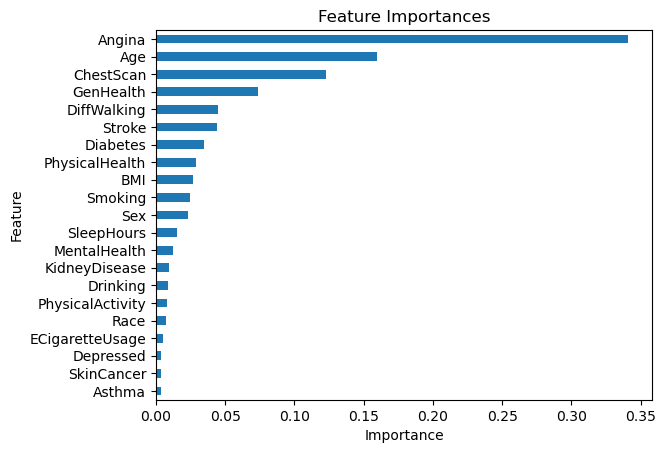

In [18]:
# Create a DataFrame for the importances
importances_df = pd.DataFrame(sorted_importances, columns=['Importance', 'Feature'])
importances_df.set_index('Feature', inplace=True)
importances_sorted = importances_df.sort_values(by='Importance')

# Plot the feature importances
importances_sorted.plot(kind='barh', title='Feature Importances', legend=False)
plt.xlabel('Importance')
plt.show()


#### 5.2.6. Receiver Operating Characteristic (ROC)

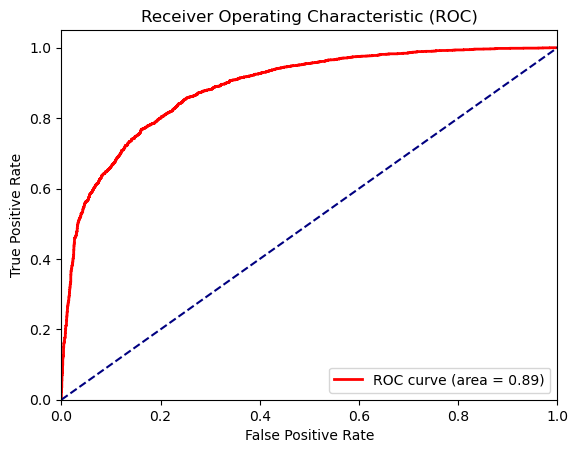

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve and AUC
y_pred_prob = best_rf_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()